# EJERCICIOS

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.utils import to_categorical
from keras.datasets import mnist

from keras.applications import ResNet101V2
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input, decode_predictions
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models
import requests

In [43]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

Num GPUs Available:  1


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [5]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos de entrada
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Si estás usando una CNN, es importante redimensionar las imágenes para que tengan un canal de profundidad
x_train = x_train[..., None]  # Agrega un eje para el canal (28,28) -> (28,28,1)
x_test = x_test[..., None]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),  # Necesario para convertir la salida en un vector 1D
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 neuronas de salida, una por cada clase
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)  

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/30


I0000 00:00:1738164510.522713   37426 service.cc:146] XLA service 0x7bdc7c004e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738164510.522769   37426 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-29 16:28:30.545871: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-29 16:28:30.652068: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 174/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 1.1768 - sparse_categorical_accuracy: 0.5985

I0000 00:00:1738164512.352545   37426 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3659 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.0462 - val_sparse_categorical_accuracy: 0.9863
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0320 - val_sparse_categorical_accuracy: 0.9912
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - loss: 0.0456 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0274 - val_sparse_categorical_accuracy: 0.9927
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0284 - val_sparse_categorical_accuracy: 0.9917
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0219 - val_sparse_categorical_accuracy: 0.9923
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - loss: 0.0253 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0320 - val_sparse_categorical_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


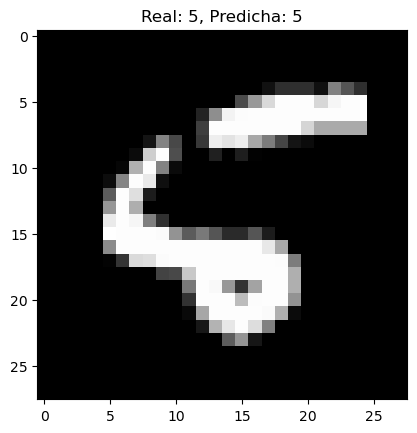

In [21]:
# Elegir una imagen del conjunto de test
index = 8  #Cambiar el índice para ver otra imagen
image = x_test[index].reshape(28, 28)  

# Realizar la predicción
predicted_label = np.argmax(model.predict(x_test[index:index+1]))

# Obtener la etiqueta real
real_label = y_test[index]

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Real: {real_label}, Predicha: {predicted_label}')
plt.show()


## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

In [29]:
# Cargar el modelo preentrenado ResNet101V2
model = ResNet101V2(weights='imagenet')

# Ruta a la carpeta que contiene las imágenes
folder_path = './Images'  # Cambia esto con tu ruta

# Crear una lista con las rutas de todas las imágenes en la carpeta
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Función para cargar, preprocesar y hacer la predicción
def predict_image(img_path):
    # Cargar la imagen con TensorFlow
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Decode as RGB

    # Redimensionar la imagen a 224x224 (tamaño esperado por ResNet101V2)
    img_resized = tf.image.resize(img, (224, 224))

    # Normalizar la imagen (llevar los valores de píxeles a [-1, 1])
    img_normalized = preprocess_input(img_resized)

    # Añadir una dimensión extra para simular el batch (lote)
    img_array = tf.expand_dims(img_normalized, axis=0)

    # Realizar la predicción
    predictions = model.predict(img_array)

    # Decodificar las predicciones (top 3)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    return decoded_predictions

# Procesar todas las imágenes en la carpeta
for img_path in image_paths:
    print(f"Predicciones para {os.path.basename(img_path)}:")
    predictions = predict_image(img_path)
    
    # Mostrar las tres predicciones más probables
    for i, (imagenet_id, label, score) in enumerate(predictions):
        print(f"{i + 1}: {label} ({score:.2f})")
    print('-' * 30)


Predicciones para fusil.jpeg:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: assault_rifle (0.94)
2: rifle (0.06)
3: military_uniform (0.00)
------------------------------
Predicciones para cuchillo.jpeg:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1: cleaver (1.00)
2: scabbard (0.00)
3: hatchet (0.00)
------------------------------
Predicciones para Manzana.jpeg:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1: pomegranate (0.94)
2: Granny_Smith (0.05)
3: custard_apple (0.00)
------------------------------
Predicciones para Pera.jpeg:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1: lemon (0.81)
2: candle (0.08)
3: jackfruit (0.02)
------------------------------


## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

In [38]:
#Cargar los datos de Food101

# Cargar el conjunto de datos Food101
dataset, info = tfds.load('food101', with_info=True, as_supervised=True)

# Obtener las etiquetas de las clases (nombres)
class_names = info.features['label'].names

# División de los datos en entrenamiento, validación y prueba
train_dataset = dataset['train']
test_dataset = dataset['validation']

# Dividir test en validación y prueba (50% cada uno)
val_dataset = test_dataset.take(5000)  # Primeros 5000 como validación
test_dataset = test_dataset.skip(5000)  # Restante como prueba


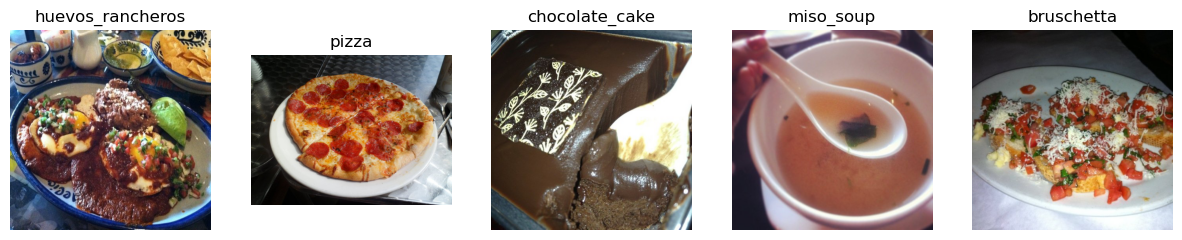

In [39]:
#Explorar los datos

# Función para mostrar algunas imágenes
def show_images(dataset, num_images=5):
    plt.figure(figsize=(15, 15))
    for idx, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, idx+1)
        plt.imshow(image)
        plt.title(class_names[label.numpy()])
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
show_images(train_dataset)


In [40]:
# Preparar los datos

# Redimensionar y normalizar imágenes
def preprocess_image(image, label):
    # Redimensionar a 224x224
    image = tf.image.resize(image, (224, 224))
    # Normalizar imágenes a rango [0, 1]
    image = image / 255.0
    return image, label

# Aplicar la preprocesamiento y augmentación a los datos
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

# Aplicar augmentación y preprocesamiento
def augment_and_preprocess(image, label):
    image = data_augmentation(image)
    return preprocess_image(image, label)

# Aplicar a los datasets
train_dataset = train_dataset.map(augment_and_preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)


In [46]:
#Crear y entrenar un modelo

# Crear el modelo MobileNetV2 con transferencia de aprendizaje
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Crear el modelo completo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')  # 101 clases de alimentos
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10


KeyboardInterrupt: 

In [ ]:
# Función para cargar la imagen desde una URL sin usar PIL
def load_image_from_url(url):
    response = requests.get(url)
    image = tf.image.decode_jpeg(response.content, channels=3)  # Decodificar la imagen
    image = tf.image.resize(image, (224, 224))  # Redimensionar a 224x224
    image = image / 255.0  # Normalizar al rango [0,1]
    return tf.expand_dims(image, axis=0)  # Añadir dimensión de batch

# URL de ejemplo (reemplázala con la imagen real)
image_url = "https://example.com/food_image.jpg"

# Cargar y preprocesar la imagen
image = load_image_from_url(image_url)

# Hacer la predicción
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

# Mostrar la clase predicha
print(f"La comida predicha es: {class_names[predicted_class]}")


## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)